# Tasks:

1. Table: Top 10 countries ranked by Facebook Likes for 2012 and 2013
2. Table: Top 10 countries ranked by Downloads for 2012 and 2013
3. Variance analysis highlighting which country saw the highest increase in Likes in the time Period above
4. Variance analysis highlighting which country saw the biggest decline in Downloads
5. Graph: Correlation between Likes and Downloads

## Data prep for task 1

In [1]:
# Read in the data
import pandas as pd
mysteryFB = pd.read_excel("mysteryFB.xlsx")
mysteryFB.shape

(803, 16)

In [2]:
mysteryFB.head()

,Date,AR,BR,CO,EG,GB,ID,IN,MX,PH,PK,RO,TH,TR,US,VN
0,2012-01-01,NaN,13215,NaN,NaN,57355,14564,37691,10606,16153,8902,8585,13101,17607,228574,NaN
1,2012-01-02,NaN,13270,NaN,NaN,57447,14586,37897,10640,16192,8931,8647,13156,17637,228882,NaN
2,2012-01-03,NaN,13326,NaN,NaN,57501,14609,38083,10679,16220,8949,8725,13202,17661,229086,NaN
3,2012-01-04,NaN,13373,NaN,NaN,57570,14634,38247,10723,16264,8972,8798,13254,17678,229329,NaN
4,2012-01-05,NaN,13441,NaN,NaN,57626,14658,38427,10759,16297,8989,8885,13300,17707,229558,NaN


In [3]:
mysteryFB.tail()

,Date,AR,BR,CO,EG,GB,ID,IN,MX,PH,PK,RO,TH,TR,US,VN
798,2014-03-09,309684.0,1275572,235110.0,248989.0,216304,339515,751456,677169,329682,218116,206837,213015,380448,886305,233616.0
799,2014-03-10,310489.0,1279693,236217.0,249301.0,216509,340670,752926,680218,330336,218972,207803,214020,384058,888156,235781.0
800,2014-03-11,310940.0,1282869,236934.0,249507.0,216778,341325,753668,682205,330666,219385,208373,215448,385718,889956,237482.0
801,2014-03-12,311419.0,1285891,237616.0,249725.0,217129,341857,754250,683562,331093,219665,208933,217020,387180,891979,239411.0
802,2014-03-13,311670.0,1287959,238222.0,249986.0,217401,342426,754957,684888,331454,219948,209525,217890,388271,893720,240662.0


In [4]:
mysteryFB.dtypes

Date    datetime64[ns]
AR             float64
BR               int64
CO             float64
EG             float64
GB               int64
ID               int64
IN               int64
MX               int64
PH               int64
PK               int64
RO               int64
TH               int64
TR               int64
US               int64
VN             float64
dtype: object

In [5]:
mysteryFB = mysteryFB.set_index("Date")

In [6]:
mysteryFB.head()

,AR,BR,CO,EG,GB,ID,IN,MX,PH,PK,RO,TH,TR,US,VN
Date,,,,,,,,,,,,,,,
2012-01-01,NaN,13215,NaN,NaN,57355,14564,37691,10606,16153,8902,8585,13101,17607,228574,NaN
2012-01-02,NaN,13270,NaN,NaN,57447,14586,37897,10640,16192,8931,8647,13156,17637,228882,NaN
2012-01-03,NaN,13326,NaN,NaN,57501,14609,38083,10679,16220,8949,8725,13202,17661,229086,NaN
2012-01-04,NaN,13373,NaN,NaN,57570,14634,38247,10723,16264,8972,8798,13254,17678,229329,NaN
2012-01-05,NaN,13441,NaN,NaN,57626,14658,38427,10759,16297,8989,8885,13300,17707,229558,NaN


In [7]:
mysteryFB.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07',
               '2014-03-08', '2014-03-09', '2014-03-10', '2014-03-11',
               '2014-03-12', '2014-03-13'],
              dtype='datetime64[ns]', name='Date', length=803, freq=None)

In [8]:
mysteryFB["Year"] = mysteryFB.index.year
mysteryFB["Month"] = mysteryFB.index.month

In [9]:
mysteryFB.sample(5, random_state=0)

,AR,BR,CO,EG,GB,ID,IN,MX,PH,PK,RO,TH,TR,US,VN,Year,Month
Date,,,,,,,,,,,,,,,,,
2012-01-09,NaN,13796,NaN,NaN,58124,14797,39526,11047,16660,9282,9561,13704,17997,230941,NaN,2012,1
2013-07-29,46842.0,214091,35352.0,31140.0,127116,74033,200512,115234,76620,46795,47187,59210,64781,493788,40869.0,2013,7
2013-09-08,110646.0,497294,75670.0,91363.0,136880,125637,311339,229734,153469,79616,69097,79266,123615,523572,76292.0,2013,9
2012-05-22,10357.0,25254,NaN,8760.0,73747,17473,71775,17775,23173,14611,18911,24255,24020,286349,NaN,2012,5
2012-08-24,16106.0,47812,6551.0,12860.0,89059,27876,95080,31213,32515,19166,22967,32770,32688,344179,6531.0,2012,8


In [10]:
mysteryFB2012 = mysteryFB[mysteryFB["Year"] == 2012]

mysteryFB2013 = mysteryFB[mysteryFB["Year"] == 2013]

In [11]:
mysteryFB2012.info

<bound method DataFrame.info of                  AR     BR       CO       EG      GB     ID      IN     MX  \
Date                                                                         
2012-01-01      NaN  13215      NaN      NaN   57355  14564   37691  10606   
2012-01-02      NaN  13270      NaN      NaN   57447  14586   37897  10640   
2012-01-03      NaN  13326      NaN      NaN   57501  14609   38083  10679   
2012-01-04      NaN  13373      NaN      NaN   57570  14634   38247  10723   
2012-01-05      NaN  13441      NaN      NaN   57626  14658   38427  10759   
...             ...    ...      ...      ...     ...    ...     ...    ...   
2012-12-27  22845.0  86528  11844.0  15723.0  102002  37537  122184  48132   
2012-12-28  22999.0  87140  11993.0  15757.0  102275  37717  122540  48695   
2012-12-29  23116.0  87839  12199.0  15794.0  102521  37879  122916  49158   
2012-12-30  23187.0  88421  12355.0  15845.0  102713  38032  123243  49541   
2012-12-31  23282.0  88925  1249

In [12]:
mysteryFB2013.info

<bound method DataFrame.info of                   AR       BR        CO        EG      GB      ID      IN  \
Date                                                                        
2013-01-01   23451.0    89458   12638.0   15900.0  103192   38355  123792   
2013-01-02   23563.0    90133   12788.0   15948.0  103392   38503  124081   
2013-01-03   23703.0    90747   12942.0   15989.0  103571   38653  124412   
2013-01-04   23798.0    91369   13057.0   16042.0  103747   38856  124751   
2013-01-05   23941.0    92097   13230.0   16080.0  103996   39046  125129   
...              ...      ...       ...       ...     ...     ...     ...   
2013-12-27  272880.0  1124902  173941.0  224777.0  177049  308923  710408   
2013-12-28  273053.0  1126423  174540.0  224920.0  177632  309152  710972   
2013-12-29  273267.0  1127752  175061.0  225073.0  178287  309431  711405   
2013-12-30  273547.0  1129186  175607.0  225240.0  178936  309781  711753   
2013-12-31  273697.0  1130312  176086.0  225

In [13]:
mysteryFB2012Sum = mysteryFB2012.sum(axis=0) 

In [14]:
mysteryFB2013Sum = mysteryFB2013.sum(axis=0)

## 1. Table: Top 10 countries ranked by Facebook Likes for 2012 and 2013

In [15]:
mysteryFB2012Sum.sort_values(ascending=False)

US       114219561.0
IN        30073025.0
GB        29575167.0
BR        14463200.0
TR        10496390.0
PH        10292867.0
TH        10245204.0
MX         9367971.0
ID         8682980.0
RO         7465850.0
PK         6178724.0
AR         4353717.0
EG         3400973.0
CO         1552629.0
VN         1439813.0
Year        736392.0
Month         2384.0
dtype: float64

In [16]:
mysteryFB2013Sum.sort_values(ascending=False)



US       180284872.0
BR       134765754.0
IN       100335637.0
MX        65886589.0
GB        47155626.0
PH        42194046.0
ID        38466240.0
TR        36629242.0
AR        31698746.0
TH        26965022.0
PK        24807072.0
EG        24238204.0
RO        22290136.0
VN        20999451.0
CO        20762728.0
Year        734745.0
Month         2382.0
dtype: float64

## Data prep for task 2


In [17]:
mysteryDownloads = pd.read_excel("mysteryDownloads.xlsx")
mysteryDownloads.shape

(6183, 13)

In [18]:
mysteryDownloads.head()

,country,country_name,start_date,end_date,downloads,updates,returns,net_downloads,promos,revenue,currency,edu_downloads,gifts
0,US,United States,2012-01-01,2012-01-31,1230241,273848,2,1230239,0,7796.98,USD,0,0
1,US,United States,2012-02-01,2012-02-29,2029356,357987,6,2029350,0,8650.29,USD,0,0
2,US,United States,2012-03-01,2012-03-31,1127162,122611,5,1127157,0,7940.58,USD,0,0
3,US,United States,2012-04-01,2012-04-30,685318,31073,10,685308,0,5879.95,USD,0,0
4,US,United States,2012-05-01,2012-05-31,725485,376146,8,725477,0,5590.18,USD,0,0


In [19]:
mysteryDownloads.tail()

,country,country_name,start_date,end_date,downloads,updates,returns,net_downloads,promos,revenue,currency,edu_downloads,gifts
6178,VA,Holy See (Vatican City State),2013-11-01,2013-11-30,0,0,0,0,0,0.0,USD,0,0
6179,VA,Holy See (Vatican City State),2013-12-01,2013-12-31,0,0,0,0,0,0.0,USD,0,0
6180,VA,Holy See (Vatican City State),2014-01-01,2014-01-31,0,0,0,0,0,0.0,USD,0,0
6181,VA,Holy See (Vatican City State),2014-02-01,2014-02-28,0,0,0,0,0,0.0,USD,0,0
6182,VA,Holy See (Vatican City State),2014-03-01,2014-03-31,0,0,0,0,0,0.0,USD,0,0


In [20]:
mysteryDownloads.dtypes

country                  object
country_name             object
start_date       datetime64[ns]
end_date         datetime64[ns]
downloads                 int64
updates                   int64
returns                   int64
net_downloads             int64
promos                    int64
revenue                 float64
currency                 object
edu_downloads             int64
gifts                     int64
dtype: object

In [21]:
selectedColumns = ["country", "start_date", "downloads"]

mysteryDownloads = mysteryDownloads[selectedColumns]

In [22]:
mysteryDownloads = mysteryDownloads.set_index("start_date")


In [23]:
mysteryDownloads["Year"] = mysteryDownloads.index.year
mysteryDownloads["Month"] = mysteryDownloads.index.month

In [24]:
mysteryDownloads.head()

,country,downloads,Year,Month
start_date,,,,
2012-01-01,US,1230241,2012,1
2012-02-01,US,2029356,2012,2
2012-03-01,US,1127162,2012,3
2012-04-01,US,685318,2012,4
2012-05-01,US,725485,2012,5


In [25]:
mysteryDownloads.tail()

,country,downloads,Year,Month
start_date,,,,
2013-11-01,VA,0,2013,11
2013-12-01,VA,0,2013,12
2014-01-01,VA,0,2014,1
2014-02-01,VA,0,2014,2
2014-03-01,VA,0,2014,3


In [26]:
mysteryDownloads2012 = mysteryDownloads[mysteryDownloads["Year"] == 2012]

In [27]:
mysteryDownloads2012.tail()

,country,downloads,Year,Month
start_date,,,,
2012-08-01,VA,0,2012,8
2012-09-01,VA,0,2012,9
2012-10-01,VA,0,2012,10
2012-11-01,VA,0,2012,11
2012-12-01,VA,0,2012,12


In [28]:
mysteryDownloads2013 = mysteryDownloads[mysteryDownloads["Year"] == 2013]

In [29]:
mysteryDownloads2013.tail()

,country,downloads,Year,Month
start_date,,,,
2013-08-01,VA,0,2013,8
2013-09-01,VA,0,2013,9
2013-10-01,VA,0,2013,10
2013-11-01,VA,0,2013,11
2013-12-01,VA,0,2013,12


In [30]:
downloads2012Grouped = mysteryDownloads2012.groupby("country")["downloads"].sum()

In [31]:
downloads2013Grouped = mysteryDownloads2013.groupby("country")["downloads"].sum()

## 2. Table: Top 10 countries ranked by Downloads for 2012 and 2013

In [32]:
downloads2012Grouped.sort_values(ascending=False).head(10)

country
IN    11447036
US    11116526
BR     8310672
KR     7847452
RU     5001045
SA     4385776
ES     3883824
DE     3279336
TR     3106290
MX     3075458
Name: downloads, dtype: int64

In [33]:
downloads2013Grouped.sort_values(ascending=False).head(10)

country
BR    18347029
US    15189584
IN    14652776
RU    12212759
MX     9908112
TR     8691089
SA     6118928
ID     4710883
DE     4632158
TH     3591919
Name: downloads, dtype: int64

## Data prep for task 3

In [34]:
df2012 = mysteryFB2012Sum.to_frame()
df2013 = mysteryFB2013Sum.to_frame()




In [35]:
df2012 = df2012.reset_index()
df2013 = df2013.reset_index()




In [36]:
df2012

,index,0
0,AR,4353717.0
1,BR,14463200.0
2,CO,1552629.0
3,EG,3400973.0
4,GB,29575167.0
5,ID,8682980.0
6,IN,30073025.0
7,MX,9367971.0
8,PH,10292867.0
9,PK,6178724.0


In [37]:
df2013

,index,0
0,AR,31698746.0
1,BR,134765754.0
2,CO,20762728.0
3,EG,24238204.0
4,GB,47155626.0
5,ID,38466240.0
6,IN,100335637.0
7,MX,65886589.0
8,PH,42194046.0
9,PK,24807072.0


In [38]:
df2012.shape

(17, 2)

In [39]:
df2012.columns = ["country", "likes"]

df2012

,country,likes
0,AR,4353717.0
1,BR,14463200.0
2,CO,1552629.0
3,EG,3400973.0
4,GB,29575167.0
5,ID,8682980.0
6,IN,30073025.0
7,MX,9367971.0
8,PH,10292867.0
9,PK,6178724.0


In [40]:
df2013.columns = ["country", "likes"]

df2013

,country,likes
0,AR,31698746.0
1,BR,134765754.0
2,CO,20762728.0
3,EG,24238204.0
4,GB,47155626.0
5,ID,38466240.0
6,IN,100335637.0
7,MX,65886589.0
8,PH,42194046.0
9,PK,24807072.0


In [41]:
combinedDf = df2012.merge(df2013, on="country", how="left")

In [42]:
combinedDf.columns = ["country", "likes_2012", "likes_2013"]

In [43]:
combinedDf["variance"] = combinedDf.var(axis=1)

combinedDf.dtypes

country        object
likes_2012    float64
likes_2013    float64
variance      float64
dtype: object

In [44]:
combinedDf

,country,likes_2012,likes_2013,variance
0,AR,4353717.0,31698746.0,3.738753e+14
1,BR,14463200.0,134765754.0,7.236352e+15
2,CO,1552629.0,20762728.0,1.845140e+14
3,EG,3400973.0,24238204.0,2.170951e+14
4,GB,29575167.0,47155626.0,1.545363e+14
5,ID,8682980.0,38466240.0,4.435213e+14
6,IN,30073025.0,100335637.0,2.468417e+15
7,MX,9367971.0,65886589.0,1.597177e+15
8,PH,10292867.0,42194046.0,5.088426e+14
9,PK,6178724.0,24807072.0,1.735077e+14


In [45]:
combinedDf = combinedDf[:15]

combinedDf

,country,likes_2012,likes_2013,variance
0,AR,4353717.0,31698746.0,3.738753e+14
1,BR,14463200.0,134765754.0,7.236352e+15
2,CO,1552629.0,20762728.0,1.845140e+14
3,EG,3400973.0,24238204.0,2.170951e+14
4,GB,29575167.0,47155626.0,1.545363e+14
5,ID,8682980.0,38466240.0,4.435213e+14
6,IN,30073025.0,100335637.0,2.468417e+15
7,MX,9367971.0,65886589.0,1.597177e+15
8,PH,10292867.0,42194046.0,5.088426e+14
9,PK,6178724.0,24807072.0,1.735077e+14


## 3. Variance analysis highlighting which country saw the highest increase in Likes in the time Period above

In [46]:
combinedDf.sort_values(by='variance', ascending=False)

,country,likes_2012,likes_2013,variance
1,BR,14463200.0,134765754.0,7.236352e+15
6,IN,30073025.0,100335637.0,2.468417e+15
13,US,114219561.0,180284872.0,2.182313e+15
7,MX,9367971.0,65886589.0,1.597177e+15
8,PH,10292867.0,42194046.0,5.088426e+14
5,ID,8682980.0,38466240.0,4.435213e+14
0,AR,4353717.0,31698746.0,3.738753e+14
12,TR,10496390.0,36629242.0,3.414630e+14
3,EG,3400973.0,24238204.0,2.170951e+14
14,VN,1439813.0,20999451.0,1.912897e+14


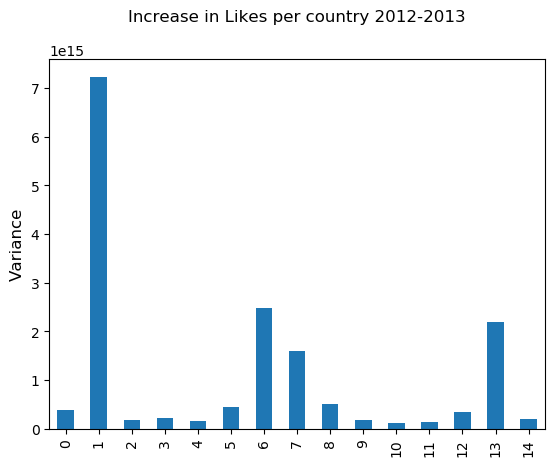

In [47]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('default')

combinedDf['variance'].plot.bar()

plt.title('Increase in Likes per country 2012-2013',
          y = 1.08) # y pads the title upward
plt.ylabel('Variance', fontsize = 12)


plt.show()

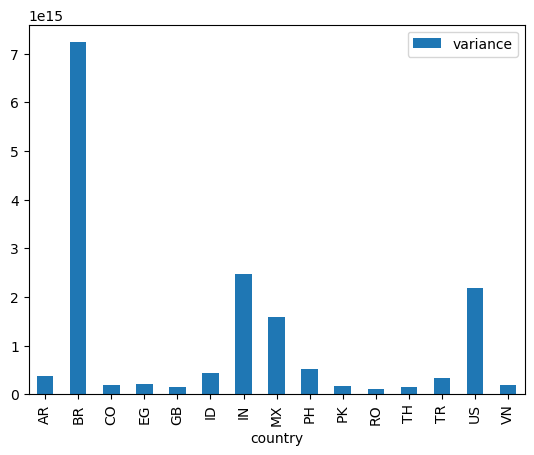

In [48]:
combinedDf.plot(x='country', y='variance', kind='bar')

In [49]:
combinedDf["net difference"] = combinedDf["likes_2013"] - combinedDf["likes_2012"]

combinedDf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,likes_2012,likes_2013,variance,net difference
0,AR,4353717.0,31698746.0,3.738753e+14,27345029.0
1,BR,14463200.0,134765754.0,7.236352e+15,120302554.0
2,CO,1552629.0,20762728.0,1.845140e+14,19210099.0
3,EG,3400973.0,24238204.0,2.170951e+14,20837231.0
4,GB,29575167.0,47155626.0,1.545363e+14,17580459.0
5,ID,8682980.0,38466240.0,4.435213e+14,29783260.0
6,IN,30073025.0,100335637.0,2.468417e+15,70262612.0
7,MX,9367971.0,65886589.0,1.597177e+15,56518618.0
8,PH,10292867.0,42194046.0,5.088426e+14,31901179.0
9,PK,6178724.0,24807072.0,1.735077e+14,18628348.0


## Data prep for task 4

In [50]:
df2012downloads = downloads2012Grouped.to_frame()
df2013downloads = downloads2013Grouped.to_frame()

In [51]:
df2012downloads = df2012downloads.reset_index()
df2013downloads = df2013downloads.reset_index()

In [52]:
df2012downloads

,country,downloads
0,--,248003
1,AD,3687
2,AE,543517
3,AF,21377
4,AG,624
...,...,...
223,YE,56206
224,YT,15
225,ZA,185136
226,ZM,5714


In [53]:
df2013downloads

,country,downloads
0,--,93578
1,AD,2375
2,AE,1330476
3,AF,46941
4,AG,3692
...,...,...
223,YE,209646
224,YT,170
225,ZA,574288
226,ZM,15626


In [54]:
df2013downloads.shape

(228, 2)

In [55]:
combinedDfdownloads = df2012downloads.merge(df2013downloads, on="country", how="left")

In [56]:
combinedDfdownloads.columns = ["country", "downloads_2012", "downloads_2013"]

In [57]:
combinedDfdownloads["variance"] = combinedDfdownloads.var(axis=1)

combinedDfdownloads.dtypes

country            object
downloads_2012      int64
downloads_2013      int64
variance          float64
dtype: object

## 4. Variance analysis highlighting which country saw the biggest decline in Downloads

In [58]:
combinedDfdownloads.sort_values(by='variance', ascending=True)

,country,downloads_2012,downloads_2013,variance
206,TV,2,1,5.000000e-01
98,IO,0,1,5.000000e-01
214,VA,0,2,2.000000e+00
152,NF,3,1,2.000000e+00
47,CS,5,1,8.000000e+00
...,...,...,...,...
113,KR,7847452,3563687,9.175321e+12
204,TR,3106290,8691089,1.559499e+13
147,MX,3075458,9908112,2.334258e+13
176,RU,5001045,12212759,2.600441e+13


In [59]:
combinedDfdownloads.sort_values(by='variance', ascending=False).head(50)

,country,downloads_2012,downloads_2013,variance
29,BR,8310672,18347029,5.036423e+13
176,RU,5001045,12212759,2.600441e+13
147,MX,3075458,9908112,2.334258e+13
204,TR,3106290,8691089,1.559499e+13
113,KR,7847452,3563687,9.175321e+12
211,US,11116526,15189584,8.294901e+12
97,IN,11447036,14652776,5.138384e+12
45,CO,552393,3497887,4.337967e+12
93,ID,1971902,4710883,3.751008e+12
219,VN,1354535,3580503,2.477467e+12


In [60]:
combinedDfdownloads["net difference"] = combinedDfdownloads["downloads_2013"] - combinedDfdownloads["downloads_2012"]

combinedDfdownloads.head(20)

,country,downloads_2012,downloads_2013,variance,net difference
0,--,248003,93578,1.192354e+10,-154425
1,AD,3687,2375,8.606720e+05,-1312
2,AE,543517,1330476,3.096522e+11,786959
3,AF,21377,46941,3.267590e+08,25564
4,AG,624,3692,4.706312e+06,3068
5,AI,115,371,3.276800e+04,256
6,AL,28066,97238,2.392383e+09,69172
7,AM,48410,123876,2.847559e+09,75466
8,AN,2905,2867,7.220000e+02,-38
9,AO,37471,88846,1.319695e+09,51375


In [61]:
pd.set_option('display.max_rows', None)

In [62]:
combinedDfdownloads.sort_values(by='variance', ascending=False).head(200)

,country,downloads_2012,downloads_2013,variance,net difference
29,BR,8310672,18347029,5.036423e+13,10036357
176,RU,5001045,12212759,2.600441e+13,7211714
147,MX,3075458,9908112,2.334258e+13,6832654
204,TR,3106290,8691089,1.559499e+13,5584799
113,KR,7847452,3563687,9.175321e+12,-4283765
211,US,11116526,15189584,8.294901e+12,4073058
97,IN,11447036,14652776,5.138384e+12,3205740
45,CO,552393,3497887,4.337967e+12,2945494
93,ID,1971902,4710883,3.751008e+12,2738981
219,VN,1354535,3580503,2.477467e+12,2225968


In [63]:
combinedDfdownloads_netNegative = combinedDfdownloads[combinedDfdownloads["net difference"] < 0]

combinedDfdownloads_netNegative

,country,downloads_2012,downloads_2013,variance,net difference
0,--,248003,93578,1.192354e+10,-154425
1,AD,3687,2375,8.606720e+05,-1312
8,AN,2905,2867,7.220000e+02,-38
15,AX,250,212,7.220000e+02,-38
27,BN,62641,21431,8.491320e+08,-41210
39,CH,327754,320392,2.709952e+07,-7362
44,CN,1406830,267237,6.493361e+11,-1139593
47,CS,5,1,8.000000e+00,-4
48,CU,43,32,6.050000e+01,-11
54,DK,236221,166688,2.417419e+09,-69533


In [64]:
combinedDfdownloads_netNegative = combinedDfdownloads_netNegative[combinedDfdownloads_netNegative["country"] != "--"]

a = combinedDfdownloads_netNegative.sort_values(by='variance', ascending=False).head(10)

a

,country,downloads_2012,downloads_2013,variance,net difference
113,KR,7847452,3563687,9.175321e+12,-4283765
44,CN,1406830,267237,6.493361e+11,-1139593
62,ES,3883824,3578536,4.660038e+10,-305288
182,SE,631458,451370,1.621584e+10,-180088
88,HK,518072,381514,9.324044e+09,-136558
106,JP,493672,377110,6.793350e+09,-116562
54,DK,236221,166688,2.417419e+09,-69533
159,OM,599498,533509,2.177274e+09,-65989
156,NO,293472,252244,8.498740e+08,-41228
27,BN,62641,21431,8.491320e+08,-41210


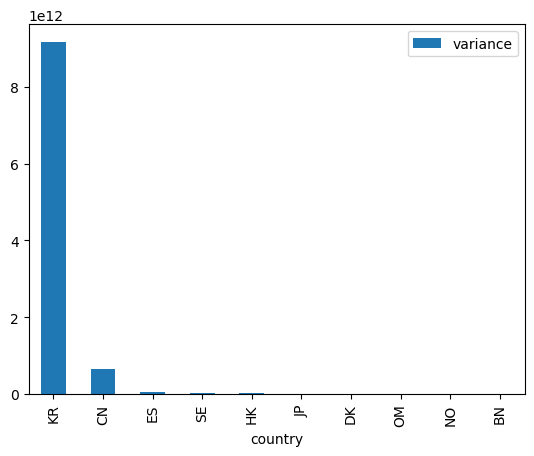

In [65]:
a.plot(x='country', y='variance', kind='bar')

## Data prep for task 5

In [66]:
mysteryFB2012Grouped = mysteryFB2012.groupby("Month").sum()

mysteryFB2012Grouped

,AR,BR,CO,EG,GB,ID,IN,MX,PH,PK,RO,TH,TR,US,VN,Year
Month,,,,,,,,,,,,,,,,
1,0.0,452814,0.0,0.0,1841454,467324,1308849,361843,530924,309803,341861,453742,576938,7282351,0.0,62372
2,0.0,518757,0.0,0.0,1881624,473669,1520642,412519,548918,348195,427416,507928,600675,7297602,0.0,58348
3,116731.0,634006,0.0,100748.0,2144929,539193,1937763,499061,652171,429545,552559,657055,716714,8281259,0.0,62372
4,288422.0,647766,0.0,242714.0,2084667,486635,1981561,465538,628157,417204,545781,651587,685432,8223117,0.0,60360
5,315248.0,752211,0.0,265715.0,2250037,532277,2188113,531656,702939,448421,580619,730098,734712,8762175,0.0,62372
6,351252.0,880532,130801.0,309792.0,2361445,612986,2344769,640652,810203,482577,602410,806606,796440,9069504,0.0,60360
7,423649.0,1157895,167342.0,359059.0,2589160,734425,2670838,802717,922527,544133,665152,918783,914717,9980854,144232.0,62372
8,485413.0,1421189,196360.0,392622.0,2726857,836154,2895731,940069,992263,585654,703207,998463,995771,10537029,194040.0,62372
9,518091.0,1589607,212525.0,398397.0,2743467,891934,2979950,1000039,1016827,598279,709805,1022193,1023358,10553187,217561.0,60360


In [67]:
mysteryFB2013.head()

,AR,BR,CO,EG,GB,ID,IN,MX,PH,PK,RO,TH,TR,US,VN,Year,Month
Date,,,,,,,,,,,,,,,,,
2013-01-01,23451.0,89458,12638.0,15900.0,103192,38355,123792,50030,42061,24187,27973,41006,41183,393717,12314.0,2013,1
2013-01-02,23563.0,90133,12788.0,15948.0,103392,38503,124081,50470,42210,24250,28066,41058,41266,394304,12390.0,2013,1
2013-01-03,23703.0,90747,12942.0,15989.0,103571,38653,124412,50937,42357,24293,28195,41110,41328,394823,12471.0,2013,1
2013-01-04,23798.0,91369,13057.0,16042.0,103747,38856,124751,51327,42499,24385,28264,41214,41442,395466,12561.0,2013,1
2013-01-05,23941.0,92097,13230.0,16080.0,103996,39046,125129,51858,42681,24461,28406,41325,41585,396589,12660.0,2013,1


In [68]:
mysteryFB2013Grouped = mysteryFB2013.groupby("Month").sum()

mysteryFB2013Grouped

,AR,BR,CO,EG,GB,ID,IN,MX,PH,PK,RO,TH,TR,US,VN,Year
Month,,,,,,,,,,,,,,,,
1,768951.0,3054149,452466.0,514042.0,3284070,1252504,3968815,1730376,1356592,778600,912106,1303002,1317830,12484215,421080.0,62403
2,773427.0,3209664,494651.0,501477.0,3098014,1237202,3810318,1864297,1316117,756919,907099,1237478,1279932,11662180,469098.0,56364
3,932367.0,3975084,618192.0,589345.0,3531945,1473377,4432404,2323920,1555408,898579,1094445,1445160,1499986,13255364,629627.0,62403
4,972359.0,4264999,676337.0,602883.0,3521495,1531225,4520269,2483907,1648234,939438,1134457,1478317,1516579,13199294,711126.0,60390
5,1081799.0,4855552,775079.0,650795.0,3710541,1716657,5011023,2818059,1878094,1091190,1234456,1625204,1638997,13975728,864096.0,62403
6,1162997.0,5261979,849441.0,696623.0,3659579,1831621,5237570,2973958,1978460,1162452,1282950,1644009,1710709,13894708,981970.0,60390
7,1374717.0,6229924,1030901.0,876708.0,3874190,2155776,5932251,3437007,2260158,1361462,1425013,1793152,1934364,14920638,1177317.0,62403
8,1710567.0,7922950,1267580.0,1235617.0,3990048,2530497,6683232,4124305,2654708,1601283,1558422,1923033,2218800,15466527,1430941.0,62403
9,3444874.0,15598886,2344580.0,2799363.0,4125721,3811177,9470218,7061590,4685746,2430672,2128941,2394530,3850487,15786295,2347811.0,60390


In [69]:
downloadCountries = ["AR", "BR", "CO", "EG", "GB", "ID", "IN", "MX", "PH", "PK", "RO", "TH", "TR", "US", "VN"]

In [70]:
mysteryDownloads2012.head()

,country,downloads,Year,Month
start_date,,,,
2012-01-01,US,1230241,2012,1
2012-02-01,US,2029356,2012,2
2012-03-01,US,1127162,2012,3
2012-04-01,US,685318,2012,4
2012-05-01,US,725485,2012,5


In [71]:
mysteryDownloads2012Br = mysteryDownloads2012[mysteryDownloads2012["country"] == "BR"]

mysteryDownloads2012Br


,country,downloads,Year,Month
start_date,,,,
2012-01-01,BR,402411,2012,1
2012-02-01,BR,612089,2012,2
2012-03-01,BR,481502,2012,3
2012-04-01,BR,411599,2012,4
2012-05-01,BR,529083,2012,5
2012-06-01,BR,585667,2012,6
2012-07-01,BR,856554,2012,7
2012-08-01,BR,892236,2012,8
2012-09-01,BR,838079,2012,9


In [72]:
mysteryDownloads2013Br = mysteryDownloads2013[mysteryDownloads2013["country"] == "BR"]

mysteryDownloads2013Br

,country,downloads,Year,Month
start_date,,,,
2013-01-01,BR,1151467,2013,1
2013-02-01,BR,969425,2013,2
2013-03-01,BR,1049391,2013,3
2013-04-01,BR,995186,2013,4
2013-05-01,BR,1138625,2013,5
2013-06-01,BR,1265231,2013,6
2013-07-01,BR,1490713,2013,7
2013-08-01,BR,1633769,2013,8
2013-09-01,BR,1578679,2013,9


In [73]:
mysteryDownloads2012Us = mysteryDownloads2012[mysteryDownloads2012["country"] == "US"]

mysteryDownloads2012Us

,country,downloads,Year,Month
start_date,,,,
2012-01-01,US,1230241,2012,1
2012-02-01,US,2029356,2012,2
2012-03-01,US,1127162,2012,3
2012-04-01,US,685318,2012,4
2012-05-01,US,725485,2012,5
2012-06-01,US,725890,2012,6
2012-07-01,US,942226,2012,7
2012-08-01,US,819004,2012,8
2012-09-01,US,613589,2012,9


In [74]:
mysteryDownloads2013Us = mysteryDownloads2013[mysteryDownloads2013["country"] == "US"]

mysteryDownloads2013Us

,country,downloads,Year,Month
start_date,,,,
2013-01-01,US,1075313,2013,1
2013-02-01,US,991759,2013,2
2013-03-01,US,864682,2013,3
2013-04-01,US,790057,2013,4
2013-05-01,US,725924,2013,5
2013-06-01,US,901450,2013,6
2013-07-01,US,1025101,2013,7
2013-08-01,US,990569,2013,8
2013-09-01,US,751363,2013,9


In [75]:
mysteryDownloads2012In = mysteryDownloads2012[mysteryDownloads2012["country"] == "IN"]

mysteryDownloads2012In

,country,downloads,Year,Month
start_date,,,,
2012-01-01,IN,991812,2012,1
2012-02-01,IN,1257082,2012,2
2012-03-01,IN,913963,2012,3
2012-04-01,IN,667870,2012,4
2012-05-01,IN,735585,2012,5
2012-06-01,IN,760432,2012,6
2012-07-01,IN,1036578,2012,7
2012-08-01,IN,1100542,2012,8
2012-09-01,IN,980951,2012,9


In [76]:
mysteryDownloads2013In = mysteryDownloads2013[mysteryDownloads2013["country"] == "IN"]

mysteryDownloads2013In

,country,downloads,Year,Month
start_date,,,,
2013-01-01,IN,1254107,2013,1
2013-02-01,IN,1307590,2013,2
2013-03-01,IN,1137941,2013,3
2013-04-01,IN,1090550,2013,4
2013-05-01,IN,1074849,2013,5
2013-06-01,IN,1138275,2013,6
2013-07-01,IN,1231539,2013,7
2013-08-01,IN,1255724,2013,8
2013-09-01,IN,1079425,2013,9


## 5. Graph: Correlation between Likes and Downloads

performed in Excel;